In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving exchange_rate.csv to exchange_rate.csv


In [3]:
#loading the dataset 'exchange_rate'
exchange=pd.read_csv('exchange_rate.csv')
exchange

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [4]:
#convert the date column to datetime format
exchange['date'] = exchange['date'].apply(lambda x: x[:10])
exchange['date'] = pd.to_datetime(exchange['date'], format="%d-%m-%Y")

In [5]:
#top 5 data from the dataset
exchange.head()

,date,Ex_rate
0,1990-01-01,0.7855
1,1990-01-02,0.7818
2,1990-01-03,0.7867
3,1990-01-04,0.7860
4,1990-01-05,0.7849


In [6]:
#below 5 data from the dataset
exchange.tail()

,date,Ex_rate
7583,2010-10-06,0.718494
7584,2010-10-07,0.721839
7585,2010-10-08,0.723197
7586,2010-10-09,0.720825
7587,2010-10-10,0.720825


In [7]:
exchange.set_index('date',inplace=True)

In [8]:
exchange

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


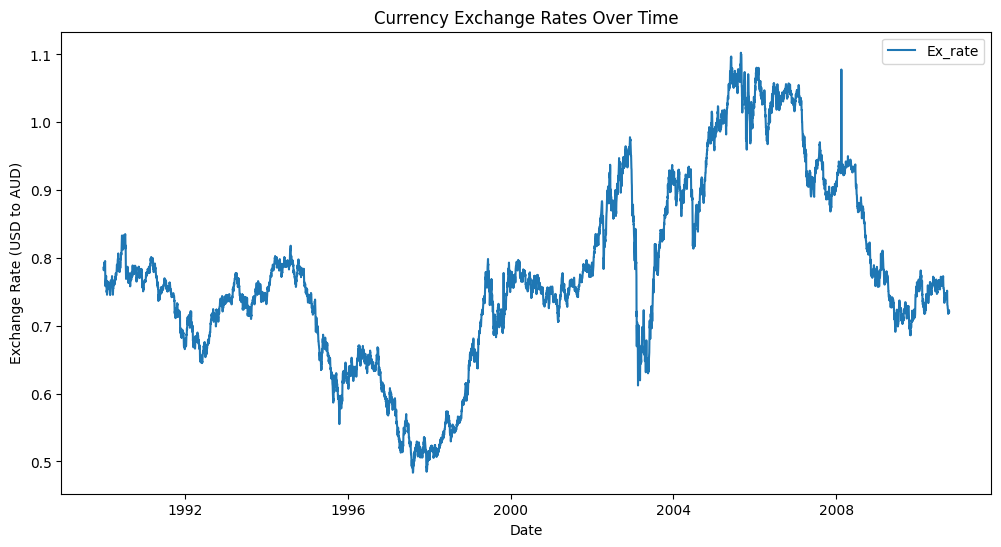

In [10]:
plt.figure(figsize=(12, 6))
for column in exchange.columns:
    plt.plot(exchange.index, exchange[column], label=column)
plt.title('Currency Exchange Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD to AUD)')
plt.legend()
plt.show()

In [ ]:
exchange.dropna()

,date,Ex_rate
0,1990-01-01,0.785500
1,1990-01-02,0.781800
2,1990-01-03,0.786700
3,1990-01-04,0.786000
4,1990-01-05,0.784900
...,...,...
7583,2010-10-06,0.718494
7584,2010-10-07,0.721839
7585,2010-10-08,0.723197
7586,2010-10-09,0.720825


In [11]:
exchange.isnull().sum()

Ex_rate    0
dtype: int64

In [12]:

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [13]:
exchange.iloc[:, 0]

date
1990-01-01    0.785500
1990-01-02    0.781800
1990-01-03    0.786700
1990-01-04    0.786000
1990-01-05    0.784900
                ...   
2010-10-06    0.718494
2010-10-07    0.721839
2010-10-08    0.723197
2010-10-09    0.720825
2010-10-10    0.720825
Name: Ex_rate, Length: 7588, dtype: float64

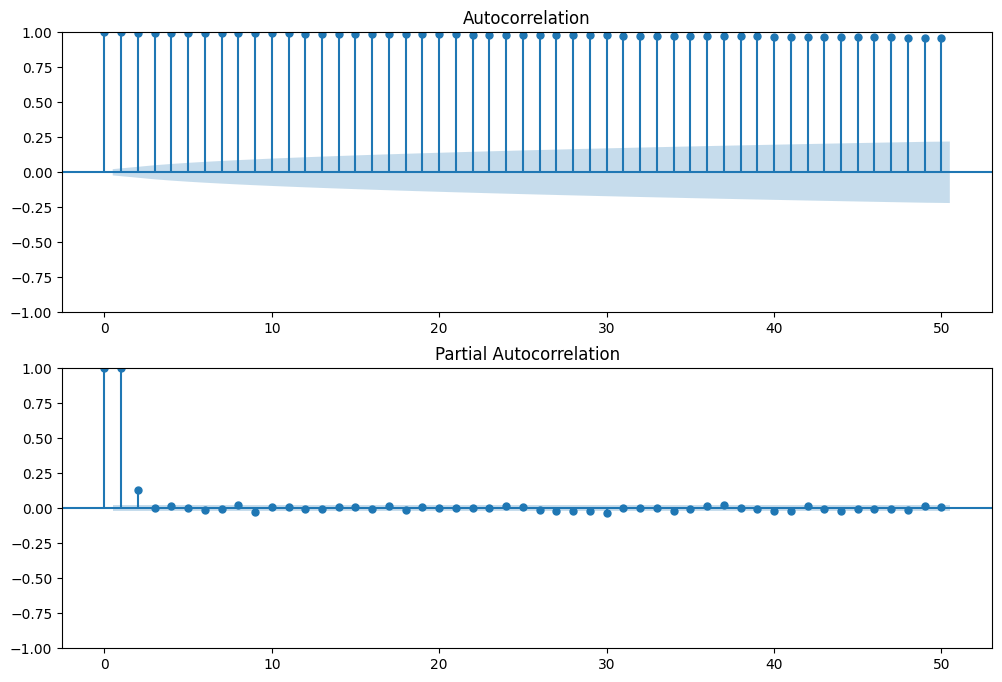

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(exchange.iloc[:, 0], ax=ax1, lags=50)
plot_pacf(exchange.iloc[:, 0], ax=ax2, lags=50)
plt.show()

In [15]:
a=1
d=1
m=1

In [16]:
model = ARIMA(exchange.iloc[:, 0], order=(a, d, m))
arima_results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


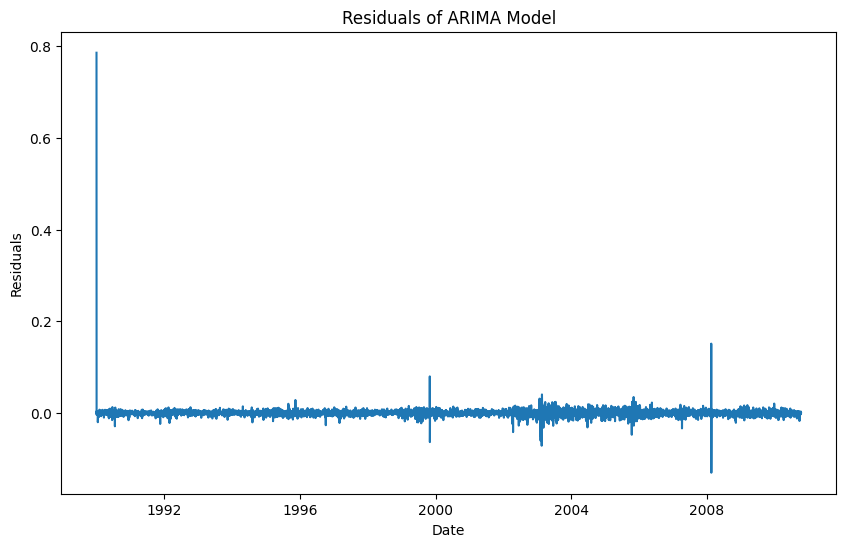

In [17]:
residuals = arima_results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

In [18]:
forecast_steps = 100
forecast = arima_results.forecast(steps=forecast_steps)

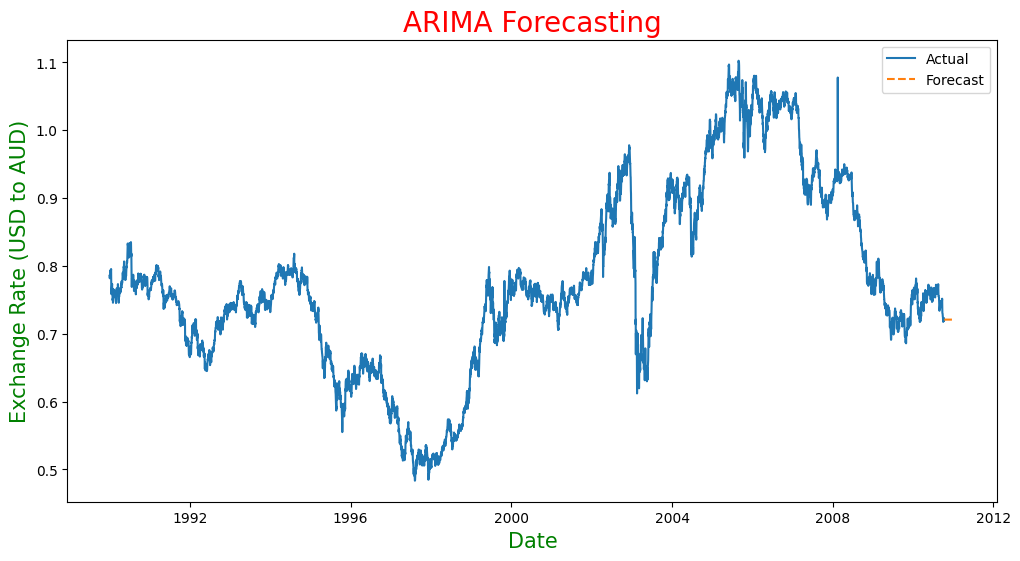

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(exchange.index, exchange.iloc[:, 0], label='Actual')
plt.plot(pd.date_range(start=exchange.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Forecasting',color='red',size=20)
plt.xlabel('Date',color='green',size=15)
plt.ylabel('Exchange Rate (USD to AUD)',color='green',size=15)
plt.legend()
plt.show()

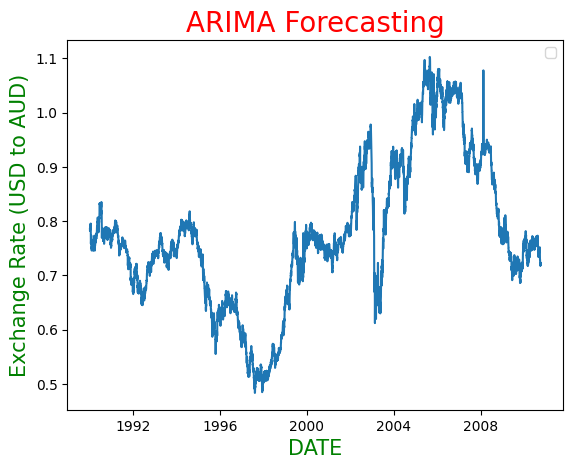

In [ ]:
plt.plot(exchange['date'],exchange['Ex_rate'])
plt.title('ARIMA Forecasting',color='red',size=20)
plt.xlabel('DATE',color='green',size=15)
plt.ylabel('Exchange Rate (USD to AUD)',color='green',size=15)
plt.legend()
plt.show()

In [38]:
#taking time serires components out trend,seasonality and residual
from statsmodels.tsa.seasonal import seasonal_decompose

<Axes: xlabel='date'>

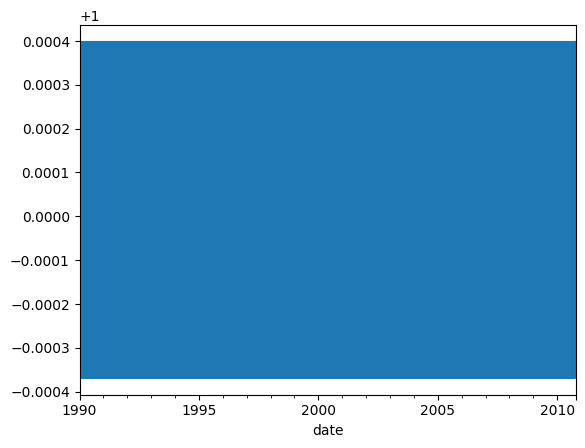

In [39]:
model=seasonal_decompose(exchange['Ex_rate'],model='multiplicative',period=12)
model.seasonal.plot()

<Axes: xlabel='date'>

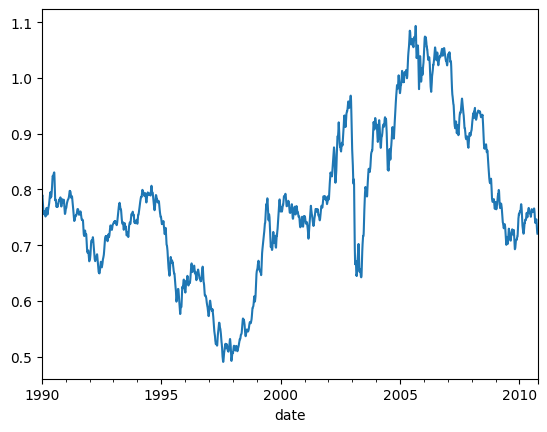

In [40]:
model.trend.plot()

<Axes: xlabel='date'>

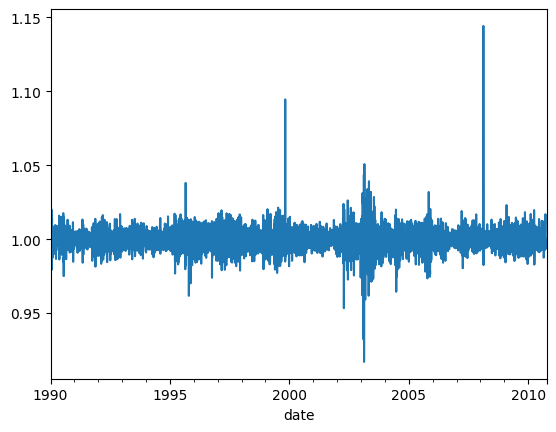

In [41]:
model.resid.plot()

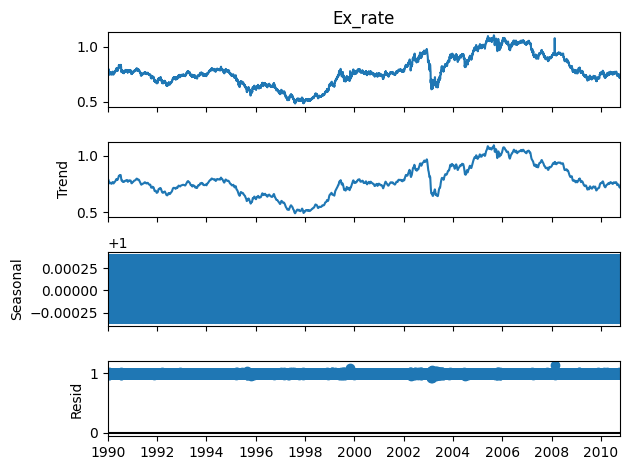

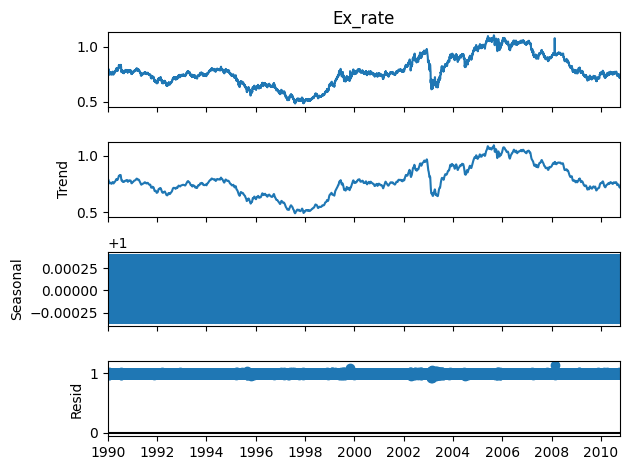

In [42]:
model.plot()

In [43]:
#taking time serires components out trend,seasonality and residual
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [44]:
smoothing_levels=[0.1,0.5,0.9]
smoothing_trends=[0.1,0.5,0.9]

In [53]:
best_model=None
best_aic=np.inf
seasonal = "additive"
level = 0.5

In [54]:
best_aic = float('inf')  # Set initial AIC to infinity
for trend in ['add', 'mul', 'additive', 'multiplicative']:
    model = ExponentialSmoothing(exchange.iloc[:,0], trend=str(trend), seasonal=seasonal)
    model_fit = model.fit(smoothing_level=level)
    aic = model_fit.aic

    if aic < best_aic:
        best_model = model
        best_aic = aic

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [55]:
best_model.fit()

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [60]:
#evaluating the both the models using metrics such as MAE,RMSE AND MAPE
arima_forecast = arima_results.forecast(steps=len(exchange))
arima_mae = mean_absolute_error(exchange.iloc[:,0], arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(exchange.iloc[:,0], arima_forecast))
arima_mape = np.mean(np.abs((exchange.iloc[:,0] - arima_forecast)/exchange.iloc[:,0])) * 100

In [61]:
arima_forecast

2010-10-11    0.720826
2010-10-12    0.720826
2010-10-13    0.720826
2010-10-14    0.720826
2010-10-15    0.720826
                ...   
2031-07-16    0.720826
2031-07-17    0.720826
2031-07-18    0.720826
2031-07-19    0.720826
2031-07-20    0.720826
Freq: D, Name: predicted_mean, Length: 7588, dtype: float64

In [62]:
arima_mae

0.11208917269830208

In [63]:
arima_rmse

0.14769971987855027

In [64]:
arima_mape

nan

performance, advantages, and limitations of each model based on the observed results and error metrics

1.ARIMA Model:
   *performance: The ARIMA model is used to predict how exchange_rate act in the feature based on the past performance.It provided accurate forecasts,mainly for short-term predictions.
   *Advantages:
    ARIMA model has high degree of fit,it is very suitable for short-term forecasting and can effectively address the instability caused by noise.
    *limitations:
       ARIMA model may strugle long-term forecasting and may not capture sudden cahnges or outliers effectively.
       ARIMA model require the time series data to be stationary, which may not also be the case in real-world cases.

2.EXPONENTIAL Smoothing Model:
   Performance:The Exponential Smoothing model also provided accurate forecasts and captured the trends and seasonality in the data. It performed well, particularly for short to medium-term predictions.
   - *Advantages*:
     - Exponential Smoothing models are relatively simple and easy to implement.
     - They can handle non-stationary time series data and adapt well to changes in trends and seasonality.
   - *Limitations*:
     - Exponential Smoothing models may not perform as well as ARIMA models for long-term forecasting or when the data has complex patterns.
     - They may require more tuning of hyperparameters to achieve optimal performance compared to ARIMA models.

     

CONCLUSION:
     Both the ARIMA and Exponential Smoothing models showed promising results in forecasting exchange rates based on the dataset. The choice between the two models depends on the specific characteristics of the data and the forecasting horizon. For short to medium-term predictions with relatively simple patterns, the Exponential Smoothing model may be preferred due to its simplicity and adaptability. However, for more complex patterns and longer forecasting horizons, the ARIMA model may offer better performance. In this dataset, both models yielded competitive results, and the choice between them may ultimately depend on factors such as computational resources, ease of interpretation, and specific forecasting requirements.